In [1]:

import pandas as pd

# boston_dataset = load_boston()

In [2]:
df=pd.read_csv("1_boston_housing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

x = df.loc[:,df.columns!='MEDV']
y = df.loc[:,df.columns=='MEDV']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train =mms.fit_transform(x_train)
x_test =mms.transform(x_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(128,input_shape = (13,),activation = 'relu',name='dense_1'))
model.add(Dense(64,activation = 'relu',name = 'dense_2'))
model.add(Dense(1,activation='linear',name='dense_output'))

model.compile(optimizer = 'adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.05,verbose=1)

Epoch 1/100
11/11 [==============================] - 3s 23ms/step - loss: 574.7360 - mae: 22.2041 - val_loss: 536.4978 - val_mae: 21.2058
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 540.0481 - mae: 21.3763 - val_loss: 501.1915 - val_mae: 20.2776
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 494.4027 - mae: 20.2219 - val_loss: 446.1193 - val_mae: 18.6963
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 421.4134 - mae: 18.1817 - val_loss: 360.7087 - val_mae: 15.8886
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 315.6507 - mae: 15.0272 - val_loss: 258.6504 - val_mae: 11.7699
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 208.7889 - mae: 11.4692 - val_loss: 185.4971 - val_mae: 11.0936
Epoch 7/100
11/11 [==============================] - 0s 6ms/step - loss: 144.7339 - mae: 9.4031 - val_loss: 170.6489 - val_mae: 11.2305
Epoch 8/100
11/11 [======================

In [9]:
mse,mae = model.evaluate(x_test,y_test)
print('MSE : ',mse)
print('MAE : ',mae)

5/5 [==============================] - 0s 3ms/step - loss: 11.2042 - mae: 2.5378
MSE :  11.204222679138184
MAE :  2.5377626419067383


In [10]:
y1 = model.predict(x_test[:])

5/5 [==============================] - 0s 2ms/step


In [11]:
y_test

,MEDV
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8
...,...
467,19.1
95,28.4
122,20.5
260,33.8


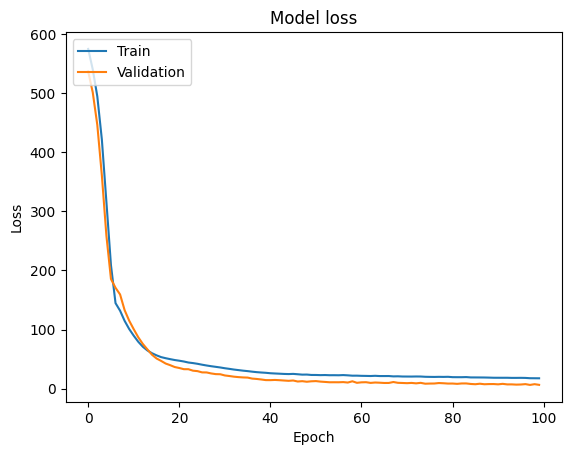

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [12]:
ps=[]
for i in y1:
    ps.append(list(i)[0])

In [13]:
d = pd.DataFrame({'actual':y_test['MEDV'],'predicted':ps})

In [14]:
d

,actual,predicted
307,28.2,30.733603
343,23.9,26.137762
47,16.6,18.003244
67,22.0,20.652790
362,20.8,20.602612
...,...,...
467,19.1,15.828679
95,28.4,27.217926
122,20.5,19.916855
260,33.8,34.720623
